<img src="../img/K-ICT_logo.jpg" width=50%>
<br>
<div align='center'><font size=5><b>분석 인프라 활용 AI 교육</b></font></div>
<br>
<div align='center'><font size=3>인공지능 빅데이터 전문가 심화과정</font></div>
<br>
<div align='right'>강사 <a href="https://open.kakao.com/me/minsuksung">성민석</a></div>
<div align='right'>minsuksung@korea.ac.kr</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#데이터-살펴보기" data-toc-modified-id="데이터-살펴보기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 살펴보기</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#피처-엔지니어링" data-toc-modified-id="피처-엔지니어링-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>피처 엔지니어링</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>모델링</a></span></li><li><span><a href="#모델-평가" data-toc-modified-id="모델-평가-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>모델 평가</a></span></li><li><span><a href="#결과-예측" data-toc-modified-id="결과-예측-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>결과 예측</a></span></li></ul></div>

<div align='center'><font size=3 color='red'><b>주의</b>: </font><font size=3><b>구글 콜랩</b>이나 <b>아나콘다</b>를 통해서 주피터 노트북을 실행해주세요!</font></div>

In [13]:
import os
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## 데이터 불러오기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [14]:
from sklearn.datasets import load_boston

In [6]:
data_boston = load_boston()

## 데이터 살펴보기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [7]:
data_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
print(data_boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

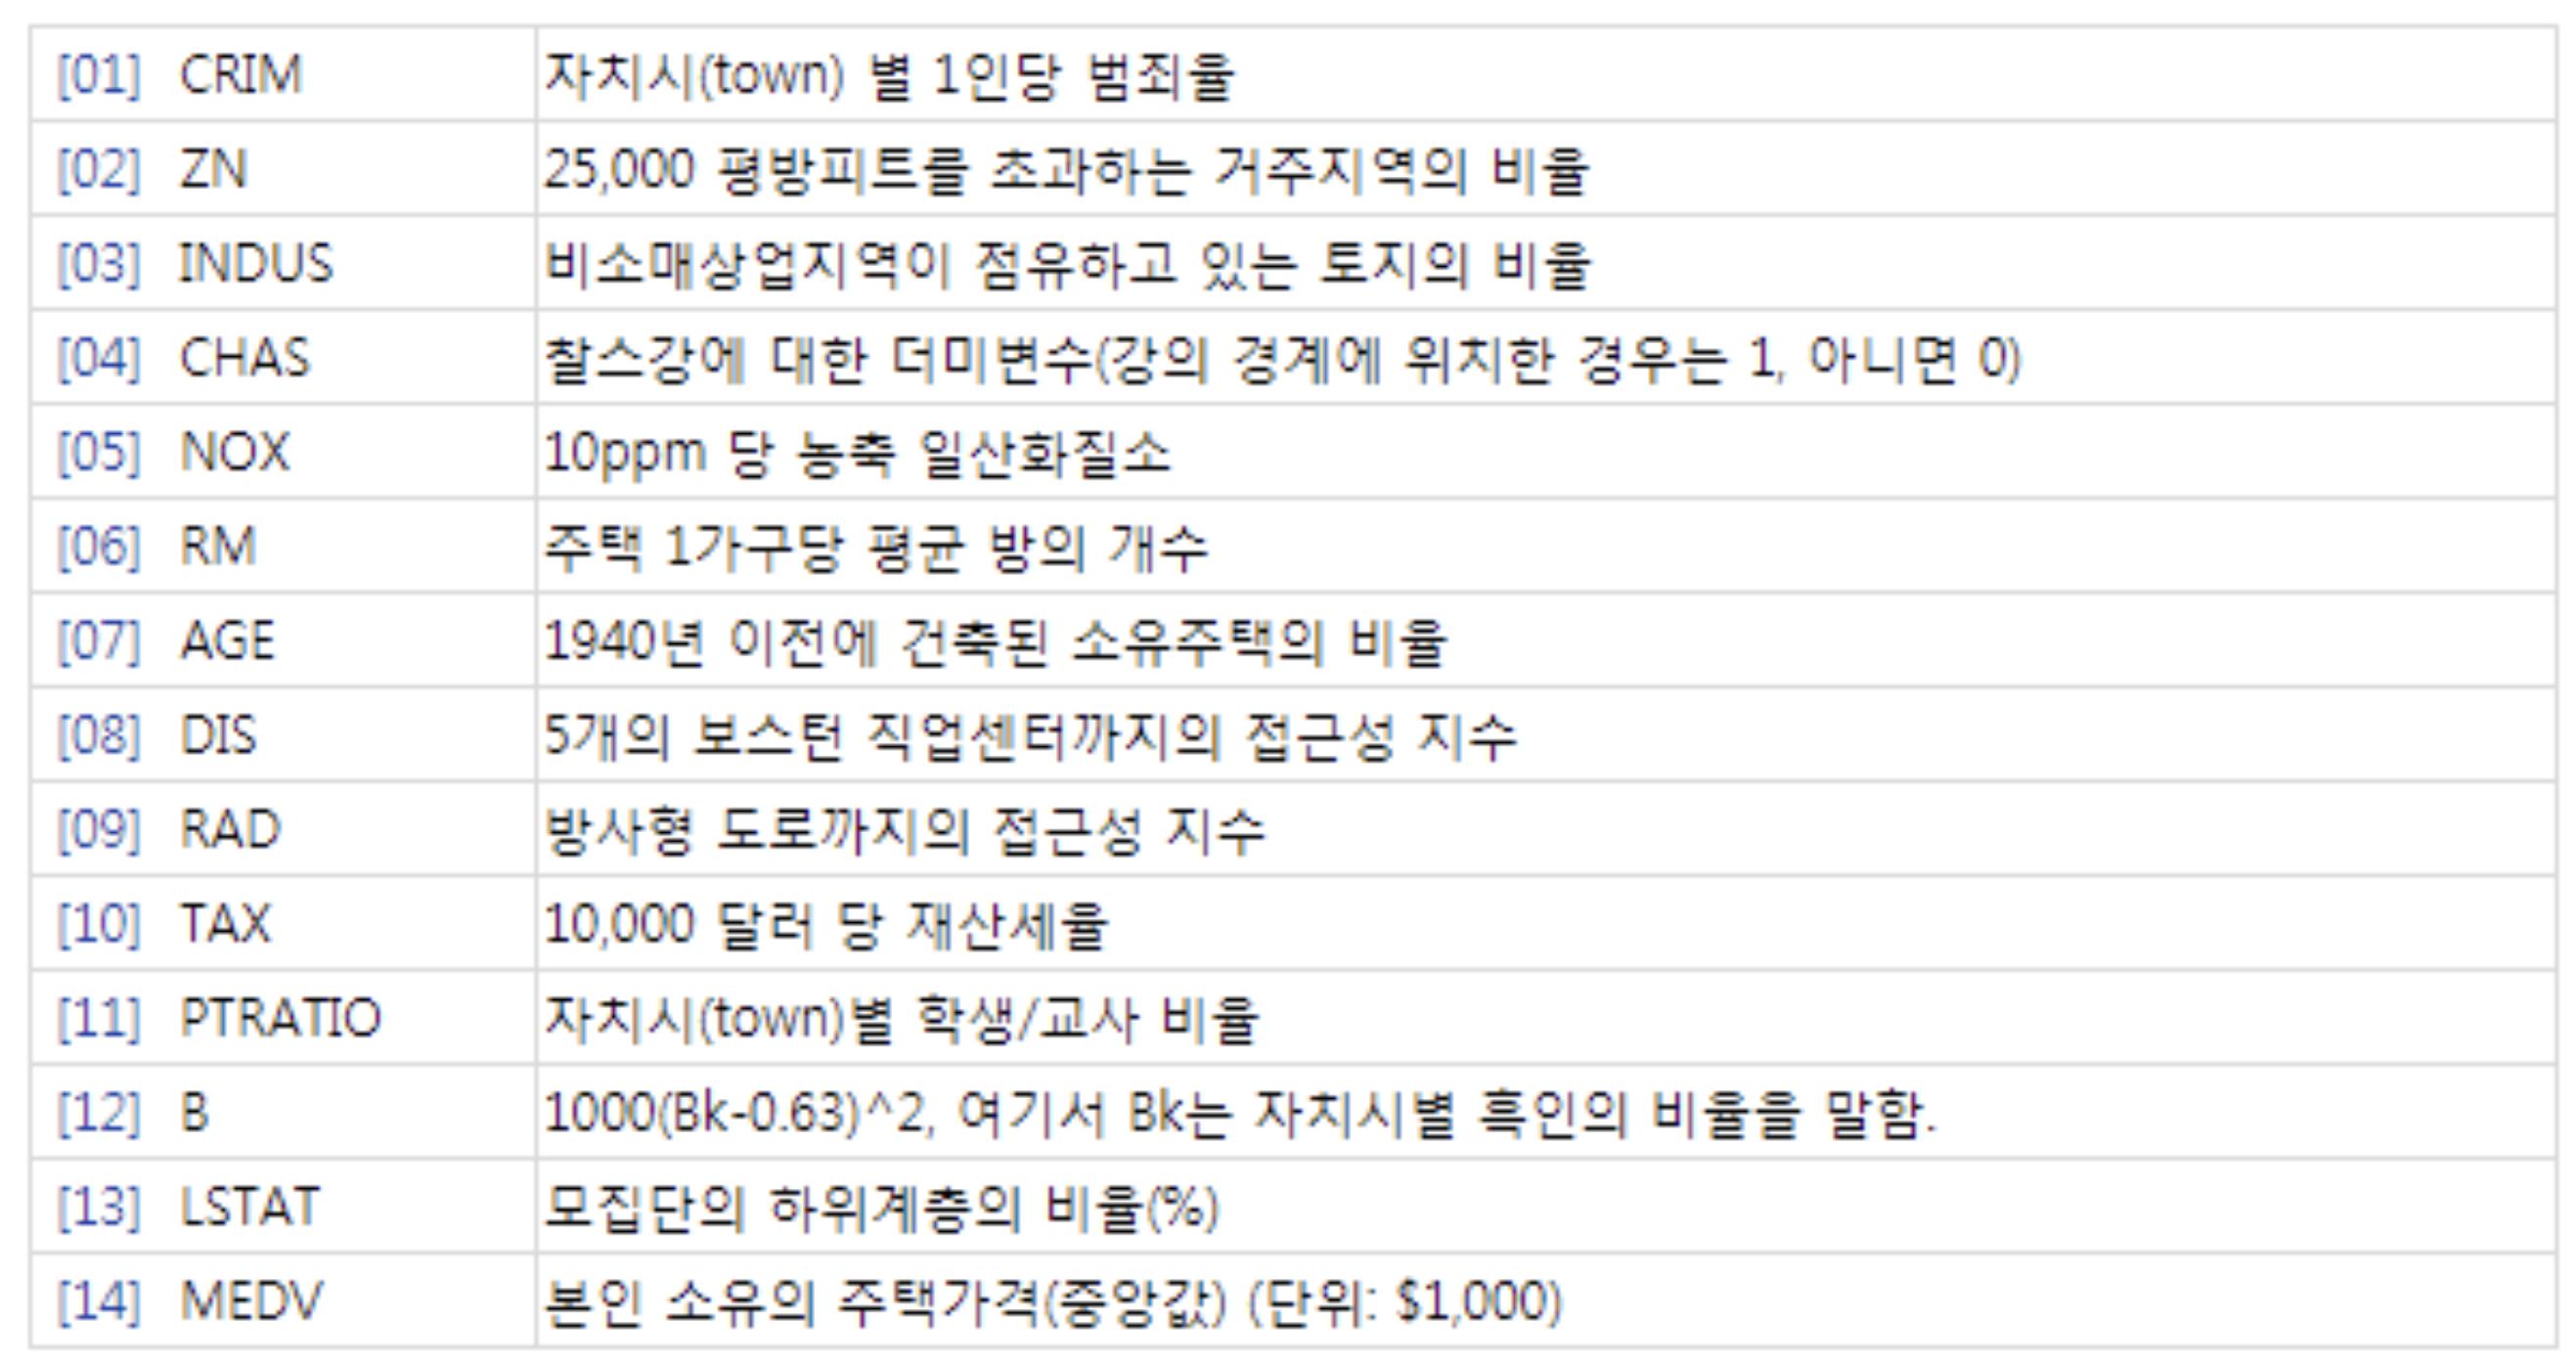

In [8]:
data_boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
data_boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
data_boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## 데이터 전처리
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [18]:
df_boston = pd.DataFrame(data_boston['data'], columns=data_boston['feature_names'])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [20]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [21]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 피처 엔지니어링
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [26]:
df_boston['AGE'] = df_boston['AGE'].round()

## 모델링
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [28]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_boston[['CRIM','CHAS','AGE']], 
                                                    data_boston['target'], 
                                                    test_size=0.2,
                                                    random_state=42)

In [37]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.score(X_train, y_train)

0.2364527671278559

## 모델 평가
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [41]:
model.score(X_test,y_test)

0.29283518033176303

## 결과 예측
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [42]:
X_test

,CRIM,CHAS,AGE
173,0.09178,0.0,84.0
274,0.05644,1.0,33.0
491,0.10574,0.0,99.0
72,0.09164,0.0,8.0
452,5.09017,0.0,92.0
...,...,...,...
412,18.81100,0.0,100.0
436,14.42080,0.0,93.0
411,14.05070,0.0,100.0
86,0.05188,0.0,45.0


In [43]:
model.predict(X_test)

array([21.94387657, 33.82648678, 20.61195175, 28.67134714, 19.75240322,
       22.82617119, 21.96518217, 20.99959766, 20.15304247, 22.25860139,
       28.41074056, 21.74361451,  6.97919323, 24.60992223, 22.7720451 ,
       22.00840233, 20.87965967, 16.30114152, 26.56999271, 17.87482909,
       27.94228403, 26.55041545, 20.75034585, 23.28030917, 18.91338157,
       18.606769  , 26.10660768, 18.26265899, 28.56885377, 23.04221317,
       21.5757468 , 24.75397791, 14.91265067, 19.81733849, 19.77356874,
       20.09405901, 23.9989471 , 25.32465776, 31.50142625, 28.81759589,
       22.85887831, 23.19574025, 26.56812906, 26.09127409, 23.55055142,
       18.75428015, 20.65562179, 28.760869  , 20.68056568, 23.65109495,
       22.0247716 , 26.12050199, 20.89721482, 23.08793203, 24.55479725,
       23.71351608, 18.8732596 , 26.91777364, 25.14277703, 23.15359734,
       25.56284398, 27.45538848, 27.41669511, 25.89328462, 26.19642333,
       27.78317476, 18.0565472 , 26.56323252, 27.45107952, 20.23